# QUANTIUM DATA ANALYSIS

In [2]:
#General Image Import Code
from IPython.display import Image

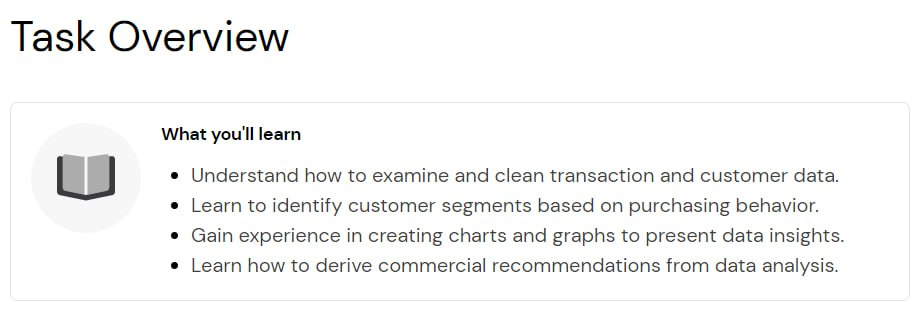

In [4]:
#Import Overview image
Image(filename = "Q_TaskOverview.jpg")

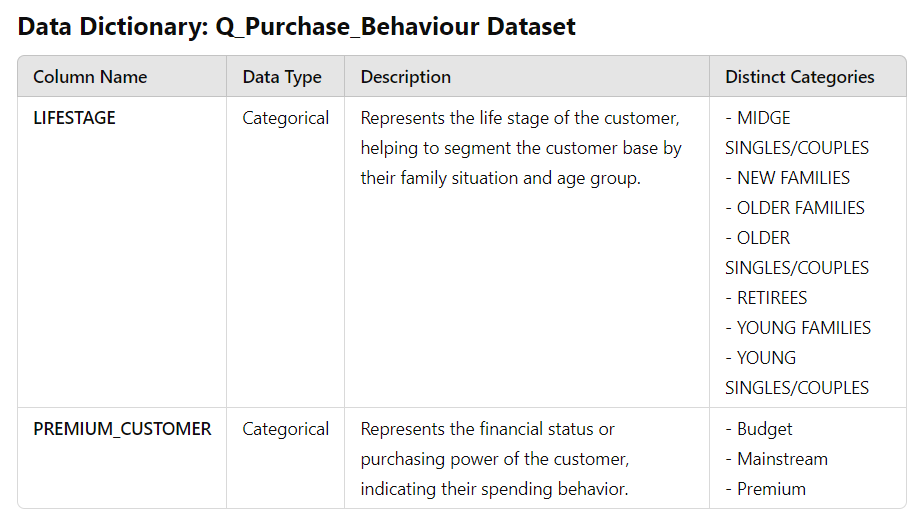

In [6]:
#Import Purchase Behaviour image
Image(filename = "Q_Purchase_Behaviour.png")

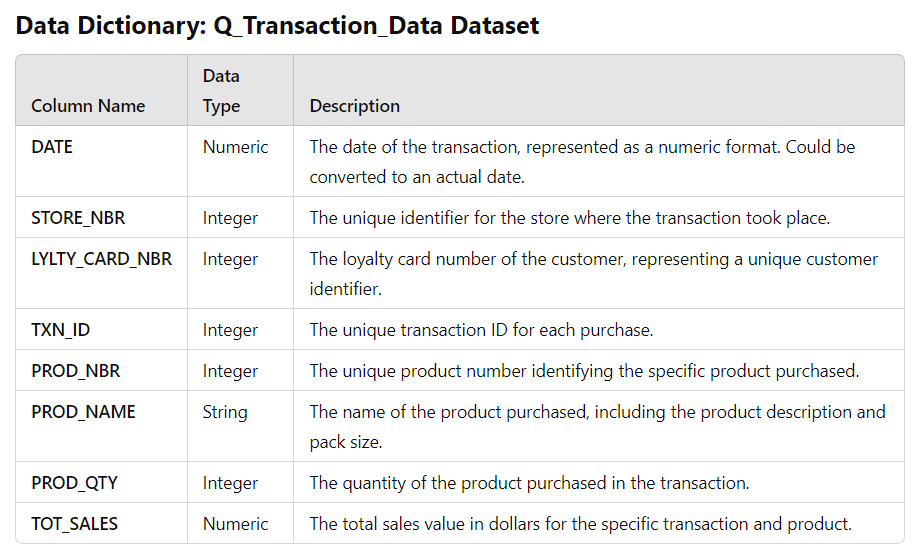

In [8]:
#Import Transaction Data image
Image(filename = "Q_Transaction_DataInfo.png")

In [10]:
# importing relevant libries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

### Importing data sets, inspection and cleaning

In [12]:
# Import the customer purchase behaviour set
cust_df = pd.read_excel("Q_Purchase_Behaviour.xlsx")

# Import the transaction data set
trxn = pd.read_excel("Q_Transaction_Data.xlsx")

In [13]:
# Display first 5 rows for the customer purchase behaviour data set
cust_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [16]:
# Display first 5 rows for the transactions data set
trxn.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [18]:
# Display first 5 rows for the transactions data set
trxn.tail()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,2018-09-22,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8


In [20]:
# Display available columns in customer purchase behaviour data set
cust_df.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

In [22]:
# Display avalable columns in transaction data set
trxn.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [28]:
# Obtain a summary statistic on numerical value bearing columns in customer purchase behaviour data set
cust_df.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [30]:
# # Obtain a summary statistic on numerical value bearing columns in transaction data set
trxn.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215616,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
min,2018-07-01 00:00:00,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226


In [32]:
# check for null in the customer purchase behaviour data set
cust_df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [34]:
# check for null in the transaction data set
trxn.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [36]:
# checking for additional information in the customer behaviour data set
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [38]:
# checking for additional information in the transaction data set
trxn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [40]:
# Display total number of entried in the customer purchase data set
len(cust_df)

72637

In [42]:
# Printing a phrase with the row count in the customer purchase behaviour data set
cdf_count_row = len(cust_df)
print("Total number of rows in customer behaviour data set: ", cdf_count_row)

Total number of rows in customer behaviour data set:  72637


In [44]:
# Printing a phrase with the row count in the Trasaction data set
tdf_count_row = len(trxn)
print("Total number of rows in Transaction data set: ", tdf_count_row)

Total number of rows in Transaction data set:  264836


In [46]:
# Sorts the transactions data set in descending order by TOT_SALES
trxn.sort_values(by = "TOT_SALES", ascending = False)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
69496,2018-08-15,49,49303,45789,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
55558,2019-05-14,190,190113,190914,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
171815,2018-08-17,24,24095,20797,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
...,...,...,...,...,...,...,...,...
259695,2018-11-13,41,41089,38002,76,Woolworths Medium Salsa 300g,1,1.5
259707,2018-10-18,41,41267,38201,76,Woolworths Medium Salsa 300g,1,1.5
197005,2018-08-11,167,167121,168928,76,Woolworths Medium Salsa 300g,1,1.5
216449,2019-03-01,264,264032,262778,76,Woolworths Medium Salsa 300g,1,1.5


In [48]:
# Sorts the customer purchase behaviour data set in descending order by TOT_SALES
cust_df.sort_values(by = "LIFESTAGE", ascending = False)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
32985,121418,YOUNG SINGLES/COUPLES,Mainstream
33028,121475,YOUNG SINGLES/COUPLES,Budget
33026,121471,YOUNG SINGLES/COUPLES,Mainstream
33010,121449,YOUNG SINGLES/COUPLES,Budget
...,...,...,...
3704,13156,MIDAGE SINGLES/COUPLES,Mainstream
7781,27342,MIDAGE SINGLES/COUPLES,Premium
18153,66195,MIDAGE SINGLES/COUPLES,Premium
33742,124071,MIDAGE SINGLES/COUPLES,Mainstream


In [50]:
# Merges the purchase behaviour and transaction data sets using the LYLTY_CARD_NBR as the common columns (unique identifier)
cust_trxn_df = pd.merge(trxn, cust_df, on = 'LYLTY_CARD_NBR')
cust_trxn_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [52]:
# Changes the data type of some existing columns
cust_trxn_df["STORE_NBR"] = cust_trxn_df["STORE_NBR"].astype(str)
cust_trxn_df["LYLTY_CARD_NBR"] = cust_trxn_df["LYLTY_CARD_NBR"].astype(str)
cust_trxn_df["TXN_ID"] = cust_trxn_df["TXN_ID"].astype(str)
cust_trxn_df["PROD_NBR"] = cust_trxn_df["PROD_NBR"].astype(str)
cust_trxn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264836 non-null  datetime64[ns]
 1   STORE_NBR         264836 non-null  object        
 2   LYLTY_CARD_NBR    264836 non-null  object        
 3   TXN_ID            264836 non-null  object        
 4   PROD_NBR          264836 non-null  object        
 5   PROD_NAME         264836 non-null  object        
 6   PROD_QTY          264836 non-null  int64         
 7   TOT_SALES         264836 non-null  float64       
 8   LIFESTAGE         264836 non-null  object        
 9   PREMIUM_CUSTOMER  264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 20.2+ MB


### Creating Relevant Measures

In [54]:
# Calculates the total sales
total_sales = trxn["TOT_SALES"].sum().astype(int)
print("Total Sales is: $", total_sales) # Prints out the total sales value

Total Sales is: $ 1934415


In [56]:
# Calculates the total quantity sold
total_qty = cust_trxn_df["PROD_QTY"].sum()
print("Total Quantity Sold is:", total_qty, "units") # Prints out the total quantity sold

Total Quantity Sold is: 505124 units


In [58]:
# Calculates the total customers
total_cust2 = cust_df["LYLTY_CARD_NBR"].count()
print("Total Customers is:", total_cust2, "members") # Prints out the total customers

Total Customers is: 72637 members


### Creating Relevant Visualization

In [60]:
# Visualizing top 5 products by total quantity in a tabular form
total_sales_by_cat = cust_trxn_df.groupby("PROD_NAME")["TOT_SALES"].sum().reset_index() # Creates a new data frame and groups the various products and aggregates their corresponding total quantity sold
top_5_prdts = total_sales_by_cat.sort_values(by = "TOT_SALES", ascending = False).head(5) # Sorts the grouped columns in descending order and retains only the top 5 entries
top_5_prdts # Calls the newly created data frame

,PROD_NAME,TOT_SALES
11,Dorito Corn Chp Supreme 380g,40352.0
86,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
77,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2
33,Kettle Mozzarella Basil & Pesto 175g,34457.4
76,Smiths Crinkle Original 330g,34302.6


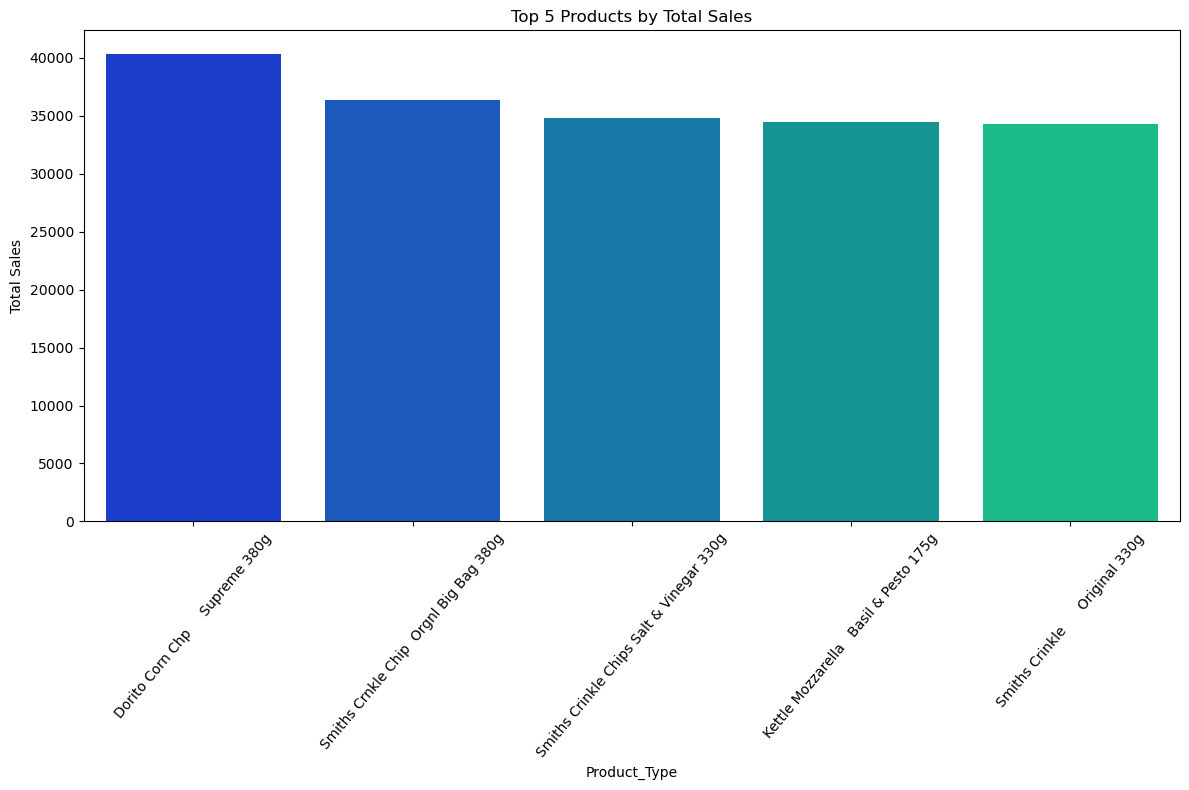

In [74]:
# Graphical representation of the top 5 performing products by total sales
plt.figure(figsize = (12,8)) # Sets figure size
sns.barplot(x = "PROD_NAME", y = "TOT_SALES", data = top_5_prdts, palette = "winter") # Calls the seaborn library to create a bar chart
plt.xlabel("Product_Type") # Sets x-axis label
plt.ylabel("Total Sales") # Sets y-axis label
plt.title("Top 5 Products by Total Sales") # Sets the title
plt.xticks(rotation = 50) # Rotates the x-axis labels at 50 degrees
plt.tight_layout() #

In [76]:
# Visualizing top 5 products by total quantity in a tabular form
total_sales_by_qty = cust_trxn_df.groupby("PROD_NAME")["PROD_QTY"].sum().reset_index() # Creates a new data frame and groups the various products and aggregates their corresponding total quantity sold
top_5_prdt_qty = total_sales_by_qty.sort_values(by = "PROD_QTY", ascending = False).head() # Sorts the grouped columns in descending order and retains only the top 5 entries
top_5_prdt_qty # Calls the newly created data frame

,PROD_NAME,PROD_QTY
11,Dorito Corn Chp Supreme 380g,6509
33,Kettle Mozzarella Basil & Pesto 175g,6381
42,Kettle Tortilla ChpsHny&Jlpno Chili 150g,6309
8,Cobs Popd Sea Salt Chips 110g,6277
10,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,6256


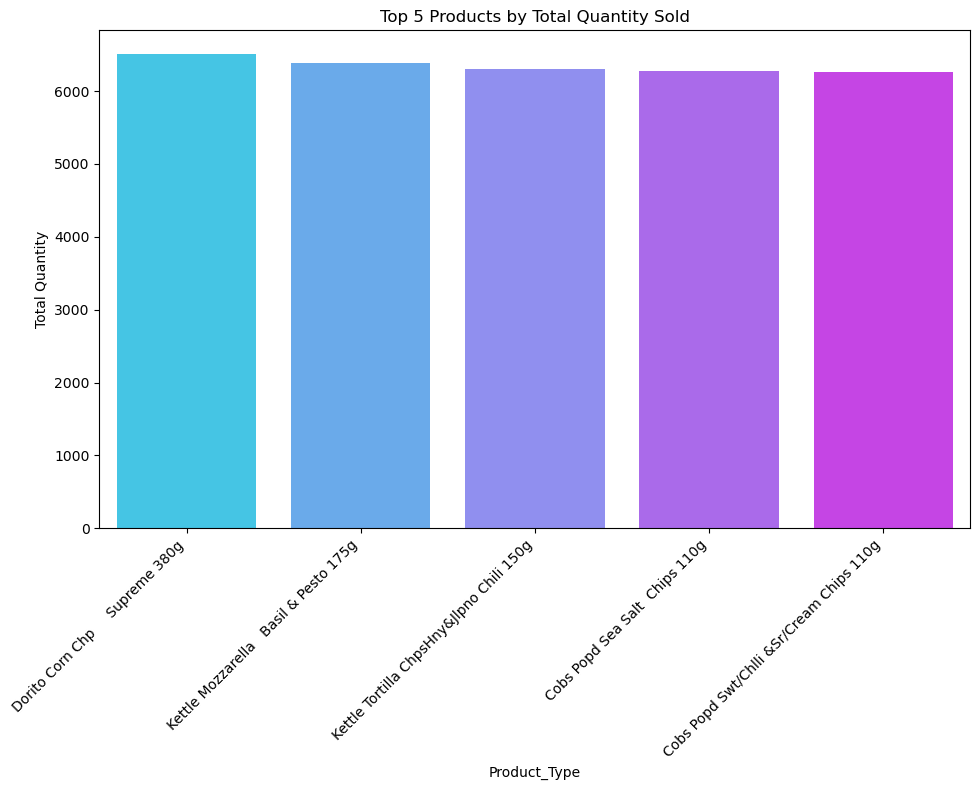

In [88]:
# Graphical representation of the top 5 performing products by quantity sold
plt.figure(figsize = (10,8)) # Sets figure size
sns.barplot(x = "PROD_NAME", y = "PROD_QTY", data = top_5_prdt_qty, palette = "cool") # Calls the seaborn library to create a bar chart
plt.xlabel("Product_Type") # Sets x-axis label
plt.ylabel("Total Quantity") # Sets y-esaxis label
plt.title("Top 5 Products by Total Quantity Sold") # Sets the title
plt.xticks(rotation = 45,ha = 'right') # Rotates the x-axis labels at 50 degree
plt.tight_layout()

In [90]:
# Visualizing top 5 stores by total sales in a tabular form
total_sales_by_cat = cust_trxn_df.groupby("STORE_NBR")["TOT_SALES"].sum().reset_index() # Creates a new data frame and groups the various products and aggregates their corresponding total quantity sold
top_5_store_sale = total_sales_by_cat.sort_values(by = "TOT_SALES", ascending = False).head() # Sorts the grouped columns in descending order and retains only the top 5 entries
top_5_store_sale # Calls the newly created data frame

,STORE_NBR,TOT_SALES
141,226,18905.45
259,88,16333.25
73,165,15973.75
207,40,15559.50
153,237,15539.50


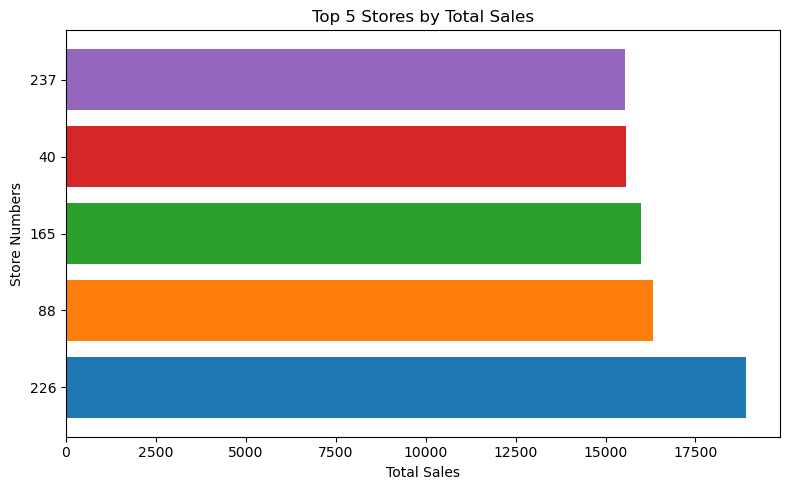

In [92]:
# Graphically represents the top 5 performing stores by total sales
plt.figure(figsize = (8,5)) # Sets figure size
plt.barh("STORE_NBR", "TOT_SALES", data = top_5_store_sale, color = plt.cm.tab10.colors) # Creates bars using the matplotlib library
plt.xlabel("Total Sales") # Sets x-axis label
plt.ylabel("Store Numbers") # Sets y-axis label
plt.title("Top 5 Stores by Total Sales") # Sets the title
plt.tight_layout() # Compresses the final visual

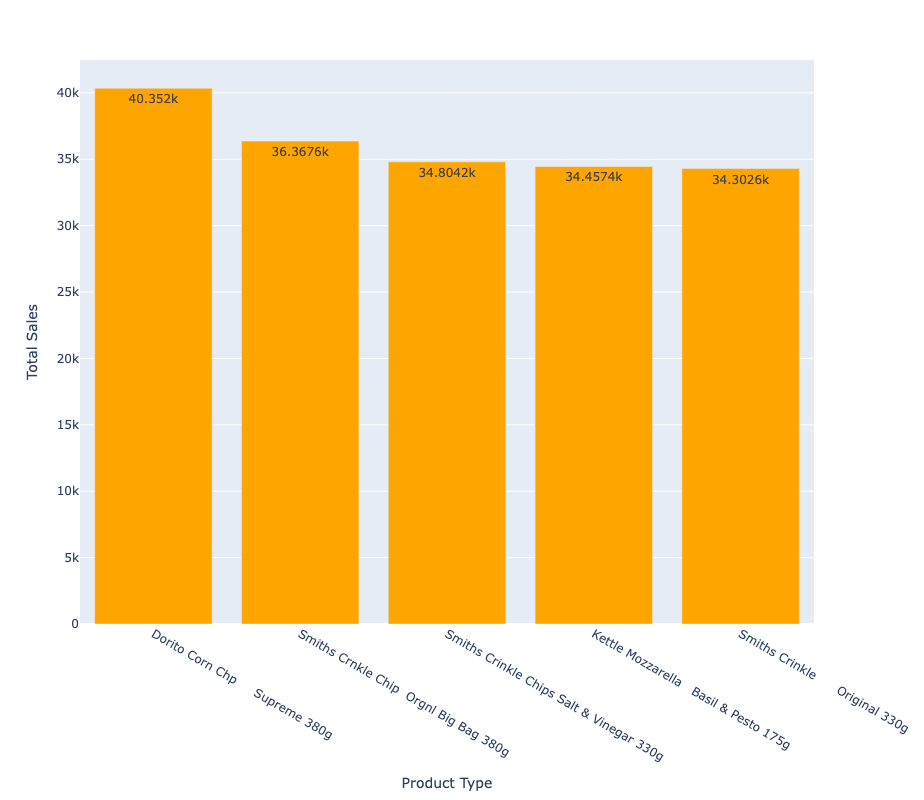

In [126]:

# Graphical representation of the top 5 performing products by total sales using plotly express
fig = px.bar(
    top_5_prdts, #specifying the dataframe containing the required data set
    x = "PROD_NAME", #specifying the column to be used for x-axis
    y = "TOT_SALES", #specifying the column to be used for y-axis
    labels = {"PROD_NAME" : "Product Type", "TOT_SALES" : "Total Sales"}, # Renaming the axis
    #title = "Top 5 Products by Total Sales", #Setting the chart title
    color_discrete_sequence = ["orange"], # changing all bars in specified color, i.e orange
    text = "TOT_SALES", # spcecify column for text labels
    text_auto = True, # automatically display the values on bars
    width = 800, # sets the width of the visuals
    height = 800 # sets the high of the visuals
)

# Center the title of the chart
fig.update_layout(title_x = 0.5) # center aligns the title

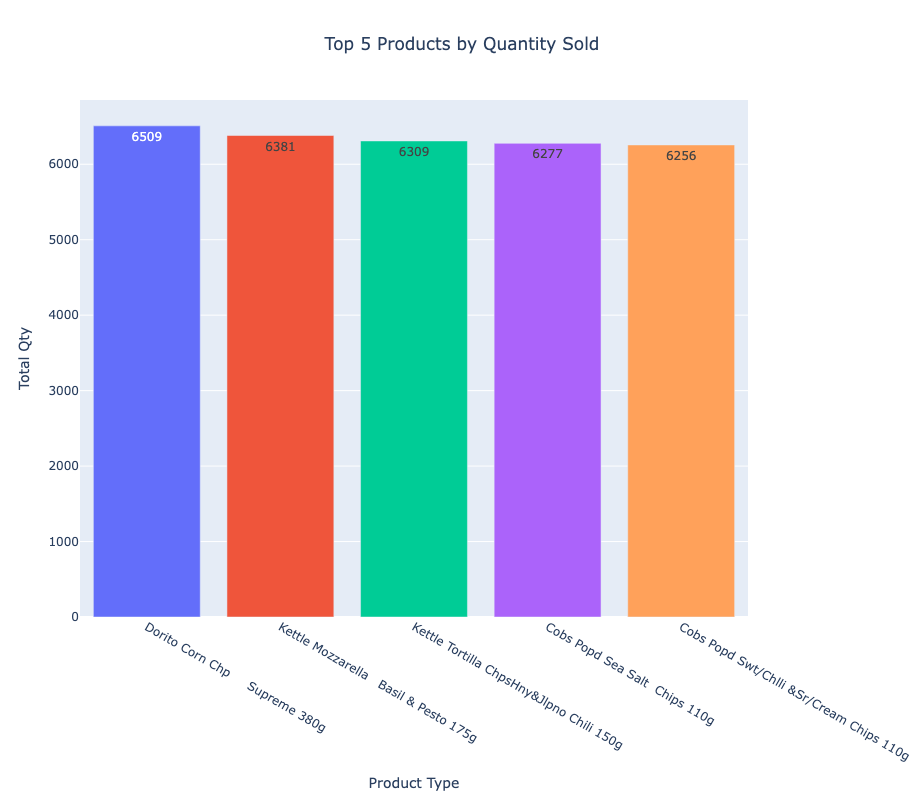

In [136]:
# Graphical representation of the top 5 performing products by product sold using plotly express
fig = px.bar(
    top_5_prdt_qty, #specifying the dataframe containing the required data set
    x = "PROD_NAME", #specifying the column to be used for x-axis
    y = "PROD_QTY", #specifying the column to be used for y-axis
    labels = {"PROD_NAME" : "Product Type", "PROD_QTY" : "Total Qty"}, # Renaming the axis
    title = "Top 5 Products by Quantity Sold", #Setting the chart title
    color = "PROD_NAME", # Using product names to differentiate colours
    text = "PROD_QTY", # spcecify column for text labels
    text_auto = True, # automatically display the values on bars
    width = 1000, # sets the width of the visuals
    height = 800 # sets the high of the visuals
)

# Center the title of the chart
fig.update_layout(title_x = 0.5) # center aligns the title
# Update the layout to hide the legend
fig.update_layout(showlegend = False)

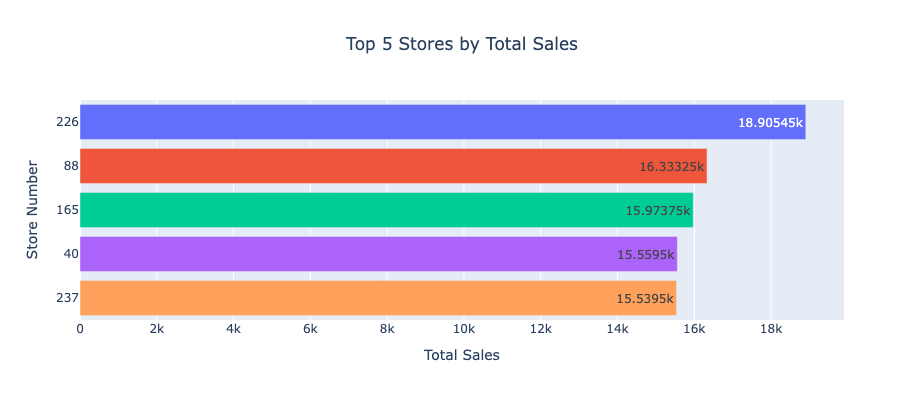

In [138]:
# Graphical representation of the top 5 stores by total sales using plotly express
fig = px.bar(
    top_5_store_sale, #specifying the dataframe containing the required data set
    x = "TOT_SALES", #specifying the column to be used for x-axis
    y = "STORE_NBR", #specifying the column to be used for y-axis
    labels = {"TOT_SALES" : "Total Sales", "STORE_NBR" : "Store Number"}, # Renaming the axis
    title = "Top 5 Stores by Total Sales", #Setting the chart title
    color = "STORE_NBR", # Using the product name to differentiate the colours
    orientation = "h", # Setting the orientation to horizontal
    text = "TOT_SALES", # spcecify column for text labels
    text_auto = True, # automatically display the values on bars
    width = 800, # sets the width of the visuals
    height = 400 # sets the high of the visuals
)

# Center the title of the chart
fig.update_layout(title_x = 0.5) # center aligns the title

# Update the layout to hide the legend
fig.update_layout(showlegend = False)
fig.show()

In [140]:
# Visualise total members by premium customer in a tabular form
cust_count = cust_trxn_df.groupby("PREMIUM_CUSTOMER")["LYLTY_CARD_NBR"].count().reset_index() #creates a variable that counts the number of customers
cust_count # calls the created variable

,PREMIUM_CUSTOMER,LYLTY_CARD_NBR
0,Budget,93157
1,Mainstream,101988
2,Premium,69691


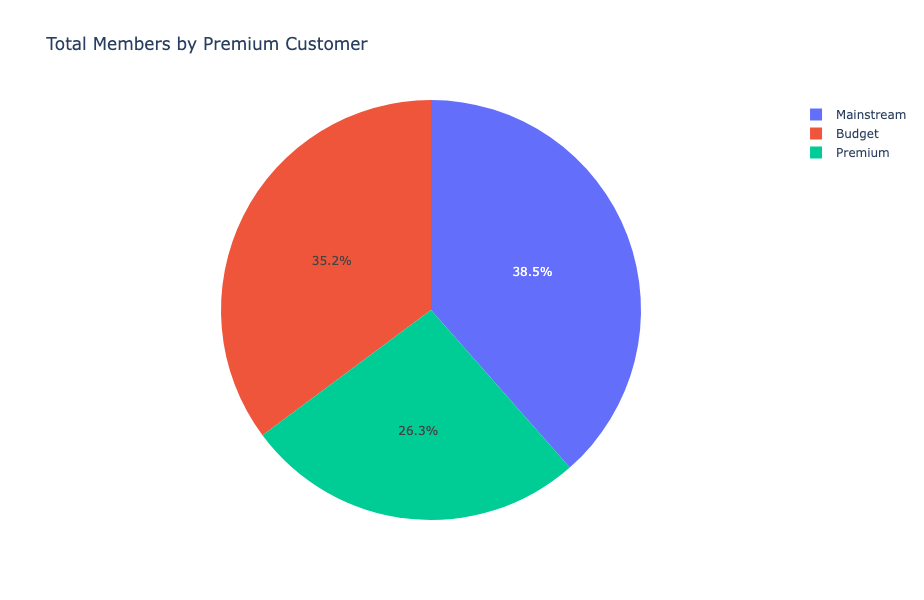

In [142]:
# Graphical representation of the Total members by Premium customer

fig = px.pie(
    cust_count, # DataFrame containing the aggregated data
    values = "LYLTY_CARD_NBR", # Column for hte size of each slice
    names = "PREMIUM_CUSTOMER", # Column for the names of each slice
    title = "Total Members by Premium Customer", # Title of the Pie Chart
    width = 800, # Sets the width of the figure
    height = 600 # Sets the height of the figure
)

# Show the plot
fig.show() # Display the visual created

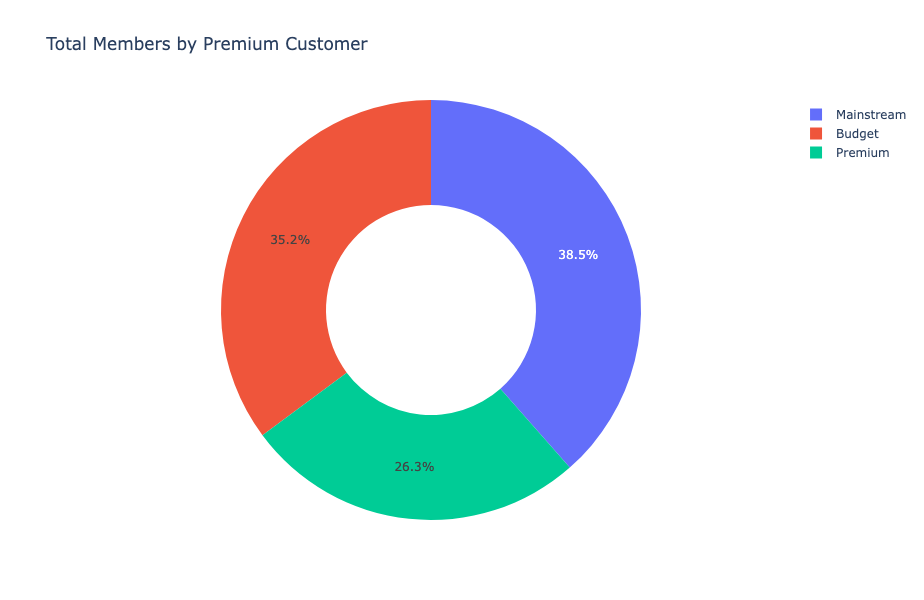

In [144]:
# Graphical representation of the Total members by Premium customer

fig = px.pie(
    cust_count, # DataFrame containing the aggregated data
    values = "LYLTY_CARD_NBR", # Column for hte size of each slice
    names = "PREMIUM_CUSTOMER", # Column for the names of each slice
    title = "Total Members by Premium Customer", # Title of the Pie Chart
    width = 800, # Sets the width of the figure
    height = 600, # Sets the height of the figure
    hole = 0.5
)

# Show the plot
fig.show() # Display the visual created

In [146]:
# Visualise total sales by life stage in a tabular form
life_stage = cust_trxn_df.groupby("LIFESTAGE")["TOT_SALES"].sum().reset_index() # create a new data frame and group the various life stages and aggregate 
life_stage_sorted = life_stage.sort_values(by = "TOT_SALES", ascending = False) # sorts the grouped columns in ascending 
life_stage_sorted 

,LIFESTAGE,TOT_SALES
3,OLDER SINGLES/COUPLES,402426.75
4,RETIREES,366470.90
2,OLDER FAMILIES,353767.20
5,YOUNG FAMILIES,316160.10
6,YOUNG SINGLES/COUPLES,260405.30
0,MIDAGE SINGLES/COUPLES,184751.30
1,NEW FAMILIES,50433.45


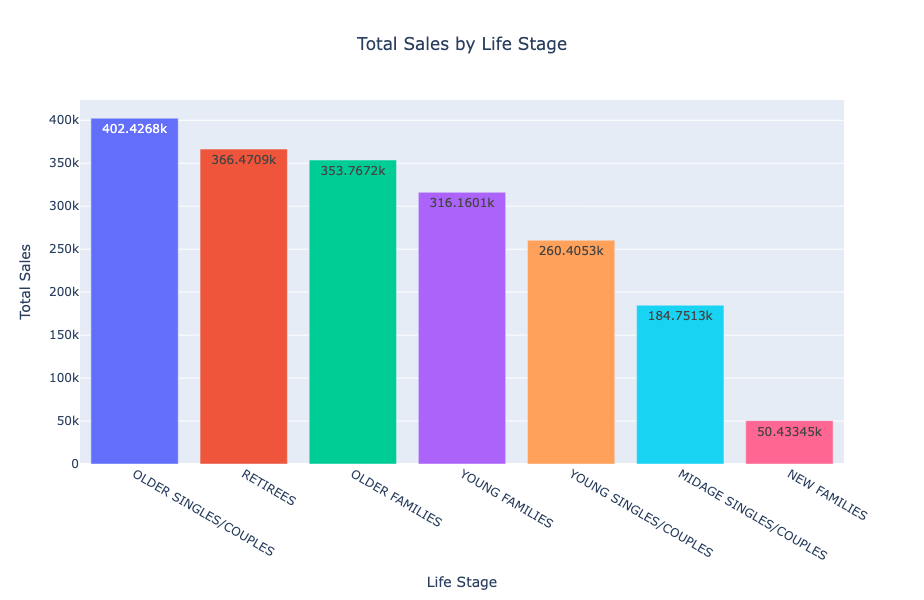

In [148]:
# Graphical representation of the total sales by life stageq18 using plotly express
fig = px.bar(
    life_stage_sorted, #specifying the dataframe containing the required data set
    x = "LIFESTAGE", #specifying the column to be used for x-axis
    y = "TOT_SALES", #specifying the column to be used for y-axis
    labels = {"LIFESTAGE" : "Life Stage", "TOT_SALES" : "Total Sales"}, # Renaming the axis
    title = "Total Sales by Life Stage", #Setting the chart title
    color = "LIFESTAGE", # Using the product name to differentiate the colours
    #orientation = "h", # Setting the orientation to horizontal
    text = "LIFESTAGE", # spcecify column for text labels
    text_auto = True, # automatically display the values on bars
    width = 800, # sets the width of the visuals
    height = 600 # sets the high of the visuals
)

# Center the title of the chart
fig.update_layout(title_x = 0.5) # center aligns the title

# Update the layout to hide the legend
fig.update_layout(showlegend = False)


In [150]:
# Visualise total sales by life stage in a tabular form
life_stage_count = cust_trxn_df.groupby("LIFESTAGE")["LYLTY_CARD_NBR"].nunique().reset_index() # create a new data frame and group the various life stages and aggregate 
life_stage_count_sorted = life_stage_count.sort_values(by = "LYLTY_CARD_NBR", ascending = False) # sorts the grouped columns in ascending 
life_stage_count_sorted 

,LIFESTAGE,LYLTY_CARD_NBR
4,RETIREES,14805
3,OLDER SINGLES/COUPLES,14609
6,YOUNG SINGLES/COUPLES,14441
2,OLDER FAMILIES,9780
5,YOUNG FAMILIES,9178
0,MIDAGE SINGLES/COUPLES,7275
1,NEW FAMILIES,2549


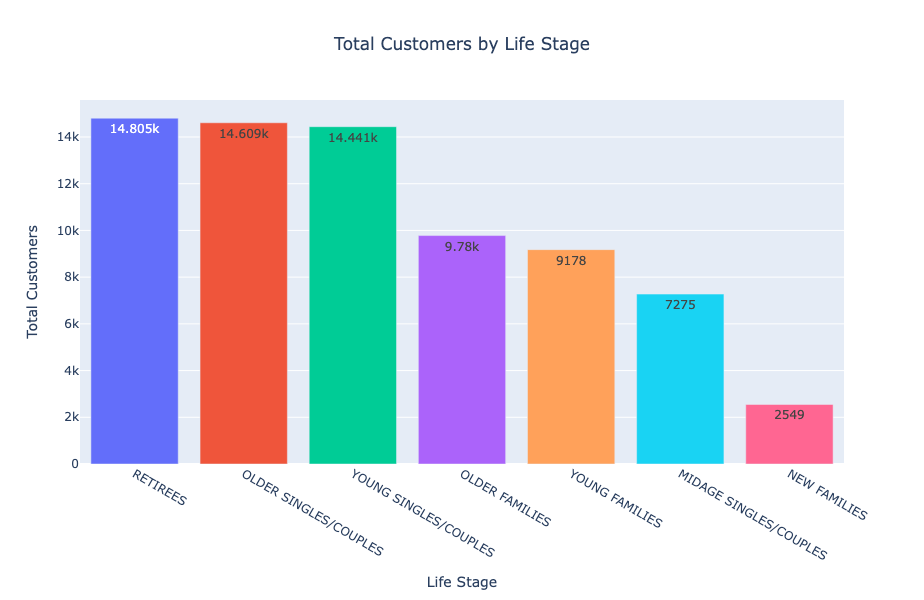

In [152]:
# Graphical representation of the total Customers by life stageq18 using plotly express
fig = px.bar(
    life_stage_count_sorted, #specifying the dataframe containing the required data set
    x = "LIFESTAGE", #specifying the column to be used for x-axis
    y = "LYLTY_CARD_NBR", #specifying the column to be used for y-axis
    labels = {"LIFESTAGE" : "Life Stage", "LYLTY_CARD_NBR" : "Total Customers"}, # Renaming the axis
    title = "Total Customers by Life Stage", #Setting the chart title
    color = "LIFESTAGE", # Using the product name to differentiate the colours
    #orientation = "h", # Setting the orientation to horizontal
    text = "LIFESTAGE", # spcecify column for text labels
    text_auto = True, # automatically display the values on bars
    width = 800, # sets the width of the visuals
    height = 600 # sets the high of the visuals
)

# Center the title of the chart
fig.update_layout(title_x = 0.5) # center aligns the title

# Update the layout to hide the legend
fig.update_layout(showlegend = False)

In [154]:
# Visualize total sales by month-year in tabular form
mnth_yr_sales = cust_trxn_df.groupby("DATE")["TOT_SALES"].sum().reset_index() # Create a new data fram and group the various dates and aggregate
mnth_yr_sales 

,DATE,TOT_SALES
0,2018-07-01,5372.2
1,2018-07-02,5315.4
2,2018-07-03,5321.8
3,2018-07-04,5309.9
4,2018-07-05,5080.9
...,...,...
359,2019-06-26,5305.0
360,2019-06-27,5202.8
361,2019-06-28,5299.6
362,2019-06-29,5497.6


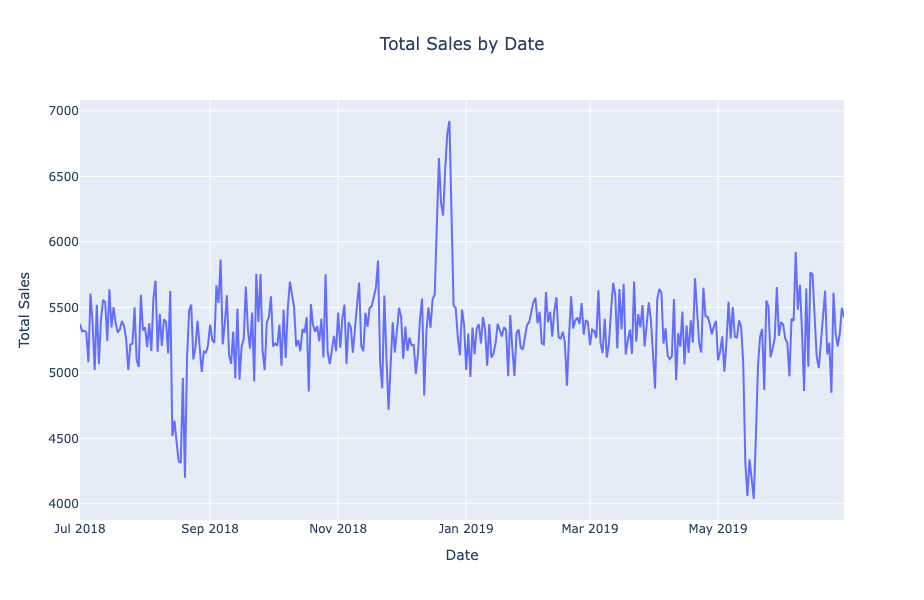

In [156]:
# Create a line graph using plotly Express
fig = px.line(
    mnth_yr_sales,
    x = "DATE",
    y = "TOT_SALES",
    title = "Total Sales by Date", # Set the title of the chart
    width = 800, # Set width
    height = 600 # Set height
)

# Update axis labels and center the title
fig.update_layout(
    xaxis_title = "Date", # Rename x-axis
    yaxis_title = "Total Sales", # Rename y-axis
    title_x = 0.5 # Center the title
)

# Show the plot 
fig.show()

In [158]:
# Visualise total sales by month-year in a tabular form
# Extract month-year from DATE
mnth_yr_sales["MNTH_YR"] = mnth_yr_sales["DATE"].dt.to_period('M').astype(str) # Extract the month year from the date column
monthly_sales = mnth_yr_sales.groupby("MNTH_YR")["TOT_SALES"].sum().reset_index() # Create a new data frome and group the various month-years and aggregate
monthly_sales # Calls the newly data frame

,MNTH_YR,TOT_SALES
0,2018-07,165275.30
1,2018-08,158731.05
2,2018-09,160522.00
3,2018-10,164415.70
4,2018-11,160233.70
5,2018-12,167913.40
6,2019-01,162642.30
7,2019-02,150665.00
8,2019-03,166265.20
9,2019-04,159845.10


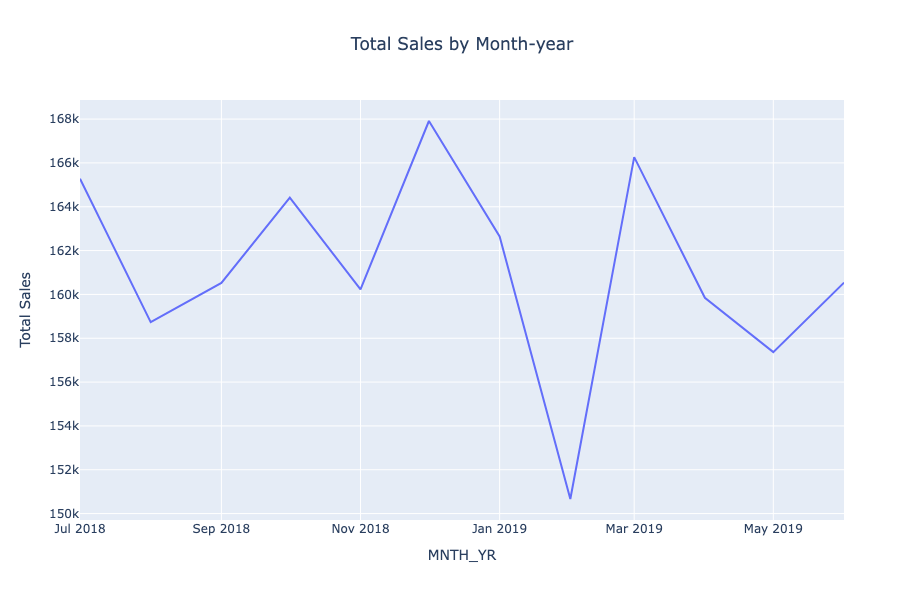

In [160]:
# Create a line graph using plotly Express
fig = px.line(
    monthly_sales,
    x = "MNTH_YR",
    y = "TOT_SALES",
    title = "Total Sales by Month-year", # Set the title of the chart
    width = 800, # Set width
    height = 600 # Set height
)

# Update axis labels and center the title
fig.update_layout(
    xaxis_title = "MNTH_YR", # Rename x-axis
    yaxis_title = "Total Sales", # Rename y-axis
    title_x = 0.5 # Center the title
)

# Show the plot 
fig.show()